# CS6 PROJECT
# ACTIVITY SELECTION PROBLEM: A THREE-WAY APPROACH SOLUTION

The activity selection problem is a combinatorial optimization problem that deals with the selection of non-conflicting activities to perform within a given time frame, given a set  of activities each marked by a start time (s)ᵢ and finish time (fᵢ). The problem is to select the maximum number of activities that can be performed by a single person or machine, assuming that a person can only work on a single activity at a time.


## Problem Statement:
Design and implement three approaches of algorithms to solve the activity selection problem, analyze the time and space complexity, and determine which approach is optimal.

## Requirements
1. Implement each algorithm approach
    * Greedy Algorithm
    * Divide and Conquer Algorithm
    * Dynamic Programming Algorithm
2. Develop a program that generates random tuples of varying sizes for testing purposes.
3. Measure the time and space complexity of each algorithm on different sample sizes.
4. Analyze and compare the time and space complexity of each algorithm.

## Implementation
### Greedy Algorithm

In [1]:
def greedy_algo(activities):
   # Sort activities by finish time
   activities.sort(key=lambda x: x[1])

   # The first activity is always selected
   i = 0
   final = [activities[0]]

   # Consider rest of the activities
   for j in range(len(activities)):
       # If this activity has start time greater than
       # or equal to the finish time of previously selected
       # activity, then select it
       if activities[j][0] >= activities[i][1]:
           final.append(activities[j])
           i = j
           
   return final

### Divide and Conquer Algorithm

In [2]:
def div_algo(activities):
   if len(activities) <= 1:
       return activities

   mid = len(activities) // 2
   left = activities[:mid]
   right = activities[mid:]

   left = div_algo(left)
   right = div_algo(right)

   return merge(left, right)

def merge(left, right):
   merged = []
   i = j = 0

   while i < len(left) and j < len(right):
       if merged:
           # Case where merged[] has content/s
           # Check for activity with the least finish time
           if left[i][1] < right[j][1] and left[i][0] >= merged[-1][1]:
               merged.append(left[i])
               i += 1
           elif left[i][1] > right[j][1] and right[j][0] >= merged[-1][1]:
               merged.append(right[j])
               j += 1
           else:
               # If finish times are the same, choose the one that has lesser duration
               if left[i][1] - left[i][0] <= right[j][1] - right[j][0] and left[i][0] >= merged[-1][1]:
                   merged.append(left[i])
                   i += 1
               else:
                   if right[j][0] >= merged[-1][1]:
                       merged.append(right[j])
                   j += 1
       else:
           # Case where merged[] is empty
           # Check for activity with the least finish time
           if left[i][1] < right[j][1]:
               merged.append(left[i])
               i += 1
           elif left[i][1] > right[j][1]:
               merged.append(right[j])
               j += 1
           else:
               # Filter for overlapping time and same finish time
               # If finish times are the same, choose the one that has lesser duration
               if left[i][1] - left[i][0] <= right[j][1] - right[j][0]:
                   merged.append(left[i])
                   i += 1
               else:
                   merged.append(right[j])
                   j += 1

   # Append any remaining activities from either list
   while i < len(left) or j < len(right):
       # If there are activities in both halves
       if i < len(left) and j < len(right):
           lefty = left[i]
           righty = right[j]
           # Choose the activity with the lowest duration
           if lefty[1] - lefty[0] < righty[1] - righty[0]:
               if not merged or lefty[0] >= merged[-1][1]:
                   merged.append(lefty)
               i += 1
           else:
               if not merged or righty[0] >= merged[-1][1]:
                   merged.append(righty)
               j += 1
       # If there are only activities in the left half
       elif i < len(left):
           lefty = left[i]
           if not merged or lefty[0] >= merged[-1][1]:
               merged.append(lefty)
           i += 1
       # If there are only activities in the right half
       elif j < len(right):
           righty = right[j]
           if not merged or righty[0] >= merged[-1][1]:
               merged.append(righty)
           j += 1

   return merged

### Dynamic Programming Algorithm

In [3]:
def dynamic_algo(activities):
   # Sort activities according to their finish time
   activities.sort(key=lambda x: x[1])

   n = len(activities)

   # Array to store solutions of sub-problems
   dp = [0 for _ in range(n)]
   selected = [[] for _ in range(n)]


   # The first activity always gets selected
   dp[0] = 1
   selected[0] = [activities[0]]

   # Fill entries in dp[] using recursive property
   for i in range(1, n):
       # Find the maximum number of activities that can
       # be performed by including the i-th activity
       for j in range(i):
           if activities[j][1] <= activities[i][0] and dp[j] + 1 > dp[i]:
               dp[i] = dp[j] + 1
               selected[i] = selected[j].copy()
       if not selected[i] or (selected[i] and selected[i][-1][1] <= activities[i][0]):
           selected[i].append(activities[i])

   # Find the index of the maximum value in dp[]
   max_index = dp.index(max(dp))

   return selected[max_index]


### Random list of tuples generation

In [4]:
import random

def rand_tuple(size, seed):
   random.seed(seed)

   tuple_list = []
   for _ in range(size):
       while True:
           s = random.randint(1, 9)
           f = random.randint(1, 9)
           if s < f:
               if (s, f) not in tuple_list:
                   tuple_list.append((s, f))
                   break
                   
   return tuple_list

## Time Complexity Analysis
### Greedy Algorithm 

```
def greedy_algo(activities):      	
 	activities.sort(key=lambda x: x[1])                                 	        O(n log n)

 	i = 0                                                                           O(1)
 	final = [activities[0]]                                                      	O(1)
 	size = len(activities)                                                     	    O(1)

 	for j in range(size):                                                       	O(1)
     	if activities[j][0] >= activities[i][1]:                               	
         	final.append(activities[j])                                       		O(1)
         	i = j                                                                     O(1)
 	return final                                                                   	O(1)
 
Tgreedy = O(n log n) + O(1) + O(1)  + O(1)  + O(1) + n(O(1) + O(1))
      	= O(n log n) 4 (O(1)) + n (2 O(1))
      	= n log n + C + nC
Tgreedy  = O(n log n)
```


### Divide and Conquer Algorithm

```
def div_algo(activities):
 	if len(activities) <= 1:                                                    	      	
     	return activities                                                                  	O(1)

 	mid = len(activities) // 2                                                          	O(1)
 	left = activities[:mid]                                                               	O(1)
 	right = activities[mid:]                                                             	O(1)

 	left = div_algo(left)                                                                 	O(n/2)
 	right = div_algo(right)                                                             	O(n/2)

 	return merge(left, right)                                                          	    O(n)


 def merge(left, right):
 	merged = []                                                                           	O(1)
 	i = j = 0                                                                               O(1)

 	while i < len(left) and j < len(right):                                          	    O(n)
     	if merged:
         	if left[i][1] < right[j][1] and left[i][0] >= merged[-1][1]:
             	merged.append(left[i])                                                 	    O(1)
             	i += 1                                                                      O(1)
         	elif left[i][1] > right[j][1] and right[j][0] >= merged[-1][1]:
             	merged.append(right[j])                                               	    O(1)
             	j += 1                                                                      O(1)
         	else:
             	if left[i][1] - left[i][0] <= right[j][1] - right[j][0] and left[i][0] >= merged[-1][1]:
                 	merged.append(left[i])                                             	    O(1)
                 	i += 1                                                                  O(1)
             	else:
                 	if right[j][0] >= merged[-1][1]:
                     	merged.append(right[j])                                       		O(1)
                 	j += 1                                                                  O(1)
     	else:
     	    if left[i][1] < right[j][1]:
             	merged.append(left[i])                                                 	    O(1)
             	i += 1   	                                                                O(1)
         	elif left[i][1] > right[j][1]:
             	merged.append(right[j])                                               	    O(1)
             	j += 1                                                                      O(1)
         	else:
             	if left[i][1] - left[i][0] <= right[j][1] - right[j][0]:
                 	merged.append(left[i])                                             	    O(1)
                 	i += 1                                                                  O(1)
             	else:
                 	merged.append(right[j])                                           	    O(1)
                 	j += 1                                                                  O(1)

 	while i < len(left) or j < len(right):                                             	    O(n)
     	if i < len(left) and j < len(right):
         	lefty = left[i]                                                                  O(1)
         	righty = right[j]                                                                O(1)
         	if lefty[1] - lefty[0] < righty[1] - righty[0]:
             	if not merged or lefty[0] >= merged[-1][1]:
                 	merged.append(lefty)                                              	     O(1)
             	i += 1                                                                       O(1)
         	else:
             	if not merged or righty[0] >= merged[-1][1]:
                 	merged.append(righty)                                            	     O(1)
             	j += 1                                                                       O(1)
     	elif i < len(left):
         	lefty = left[i]                                                                  O(1)
         	if not merged or lefty[0] >= merged[-1][1]:
             	merged.append(lefty)                                                  	     O(1)
         	i += 1                                                                           O(1)
     	elif j < len(right):
         	righty = right[j]                                                                O(1)
         	if not merged or righty[0] >= merged[-1][1]:
             	merged.append(righty)                                                	     O(1)
         	j += 1                                                                           O(1)

 	return merged                                                                       	 O(1)
 
    Tdiv = Tdivide x Tmerge
 Tdivide = O(1) + O(1) + O(1) + O(1) + O(n/2) + O(n/2) + O(n)
      	= 4 x O(1) + 2 x O(n/2) + O(n)
      	= 4C + 2n/2k + n
      	= 4C + n/2k ; n/2k = 1, k = log2n
Tdivide = O(log n)
 
Tmerge = 2 x O(1) + n x (16 x O(1)) + n (13 x O(1))
      	= 2C + nC + nC
      	= 2C + 2nC
Tmerge  = O(n)
Tdiv 	= O (n log n)

```

### Dynamic Programming Algorithm
```
def dynamic_algo(activities):
 	activities.sort(key=lambda x: x[1])                                           	O(n log n)

 	n = len(activities)                                                                   	O(1)

 	dp = [0 for _ in range(n)]                                                        	O(n)
 	selected = [[] for _ in range(n)]                                                	O(n)

 	dp[0] = 1                                                                               		O(1)
 	selected[0] = [activities[0]]                                                      	O(1)

 	# Fill entries in dp[] using recursive property
 	for i in range(1, n):                                                                 	O(n)
     	for j in range(i):                                                                  		O(n)
         	if activities[j][1] <= activities[i][0] and dp[j] + 1 > dp[i]:
             	dp[i] = dp[j] + 1                                                           	O(1)
             	selected[i] = selected[j].copy()                                     	O(1)
     	if not selected[i] or (selected[i] and selected[i][-1][1] <= activities[i][0]):
         	selected[i].append(activities[i])                                        		O(1)

 	max_index = dp.index(max(dp))                                             	O(1)

 	return selected[max_index]                      	                          	O(1)
 
Tdynamic = O(n log n) + O(n) + O(n)+ O(1) + O(1) + O(1) + O(1) + O(1) + O(n (O (n) + O(1) + O(1) + O(1)))
      	 = O(n log n)5 x O(1) + 2 x O(n) + O(n) x O(n) x 3 x O(1)
      	= n log n + 5C + 2n + n2 x 3n
Tdynamic = O(n2)
```

## Space Complexity Analysis
### Greedy Algorithm

```
def greedy_algo(activities):                                              		O(n)
 	activities.sort(key=lambda x: x[1])                                 	

 	i = 0                                                                            	O(1)
 	final = [activities[0]]                                                      	O(1)
 	size = len(activities)                                                     	O(1)

 	for j in range(size):                                                       	O(1)
     	if activities[j][0] >= activities[i][1]:                               	
         	final.append(activities[j])                                       	
         	i = j                                                                      	
 	return final                                                                   	O(n)         	                                    	
Tgreedy = O(n) + O(1) + O(1)  + O(1)  + O(1)
      	= O(n) 4 x O(1)
      	= n + 4C1
Tgreedy  = O(n)
```

## Divide and Conquer Algorithm
```
def div_algo(activities):                                                              		O(n)
 	if len(activities) <= 1:                                                    	      	
     	return activities                                                                  	

 	mid = len(activities) // 2                                                          	O(1)
 	left = activities[:mid]                                                               	O(n/2)
 	right = activities[mid:]                                                             	O(n/2)

 	left = div_algo(left)                                                                 	O(n)
 	right = div_algo(right)                                                             	O(n)

 	return merge(left, right)                                                          	O(n)


 def merge(left, right):
 	merged = []                                                                           	O(1)
 	i = j = 0                                                                                  		O(1)

 	while i < len(left) and j < len(right):                                          	
     	if merged:
         	if left[i][1] < right[j][1] and left[i][0] >= merged[-1][1]:
                 merged.append(left[i])                                                 	
             	i += 1                                                                         	
         	elif left[i][1] > right[j][1] and right[j][0] >= merged[-1][1]:
                 merged.append(right[j])                                               	
             	j += 1                                                                         	
         	else:
             	if left[i][1] - left[i][0] <= right[j][1] - right[j][0] and left[i][0] >= merged[-1][1]:
                     merged.append(left[i])                                             	
                 	i += 1                                                                     	
             	else:
                 	if right[j][0] >= merged[-1][1]:
                         merged.append(right[j])                                       	
                 	j += 1                                                                     	
     	else:
         	if left[i][1] < right[j][1]:
                 merged.append(left[i])                                                 	
             	i += 1   	                                                                  	
         	elif left[i][1] > right[j][1]:
                 merged.append(right[j])                                               	
             	j += 1                                                                         	
         	else:
             	if left[i][1] - left[i][0] <= right[j][1] - right[j][0]:
                     merged.append(left[i])                                             	
                 	i += 1                                                                     	
             	else:
                     merged.append(right[j])                                           	
                 	j += 1                                                                     	

 	while i < len(left) or j < len(right):                                             	
     	if i < len(left) and j < len(right):
         	lefty = left[i]                                                                    		O(1)
         	righty = right[j]                                                                		O(1)
         	if lefty[1] - lefty[0] < righty[1] - righty[0]:
             	if not merged or lefty[0] >= merged[-1][1]:
                 	merged.append(lefty)                                              	
             	i += 1                                                                         	
         	else:
             	if not merged or righty[0] >= merged[-1][1]:
                     merged.append(righty)                                            	
             	j += 1                                                                         	
     	elif i < len(left):
         	lefty = left[i]                                                                    	
         	if not merged or lefty[0] >= merged[-1][1]:
             	merged.append(lefty)                                                  	
         	i += 1                                                                             	
     	elif j < len(right):
         	righty = right[j]                                                                	
         	if not merged or righty[0] >= merged[-1][1]:
                 merged.append(righty)                                                	
         	j += 1                                                                             	

 	return merged                                                                       	O(n)
 
    Tdiv = max(Tdivide, Tmerge) 
 Tdivide = O(n) + O(n) + O(n) + O(n) + O(n/2) + O(n/2) + O(1)
      	= 4 x O(n) + 2 x O(n/2) + O(n)
      	= 4n + 2n/2k + n3 
Tdivide = O(n)
Tmerge = 4 x O(1) + O(n)
      	= 4C1 + n
Tmerge  = O(n)
Tdiv 	= O (n)
```

## Dynamic Programming Algorithm
```
def dynamic_algo(activities):                                                      		O(n)
 	activities.sort(key=lambda x: x[1])                                           	

 	n = len(activities)                                                                   	O(1)

 	dp = [0 for _ in range(n)]                                                        	O(n)
 	selected = [[] for _ in range(n)]                                                	O(n)

 	dp[0] = 1                                                                               		O(1)
 	selected[0] = [activities[0]]                                                      	O(1)

 	# Fill entries in dp[] using recursive property
 	for i in range(1, n):                                                                 	
     	for j in range(i):                                                                  		O(1)
         	if activities[j][1] <= activities[i][0] and dp[j] + 1 > dp[i]:
             	dp[i] = dp[j] + 1                                                           	
             	selected[i] = selected[j].copy()                                     	
     	if not selected[i] or (selected[i] and selected[i][-1][1] <= activities[i][0]):
             selected[i].append(activities[i])                                        	

 	max_index = dp.index(max(dp))                                             	O(1)

 	return selected[max_index]                                                    	O(n)
 Tdynamic = O(n) + O(n) +  O(n) + O(n) + O(1) + O(1) + O(1) + O(1) + O(1) + O(1)
      	 = 5 x O(n) + 5 x O(1)
      	= 5n + 5C1
Tdynamic = O(n)
```

### Sample List of Activities

In [5]:
Act_1 = rand_tuple(10, 1)
Act_2 = rand_tuple(10, 2)
Act_3 = rand_tuple(10, 3)
print(f"Act_1: {Act_1}")
print(f"Act_2: {Act_2}")
print(f"Act_3: {Act_3}")

Act_1: [(1, 8), (2, 6), (1, 9), (1, 7), (4, 7), (4, 8), (8, 9), (4, 6), (3, 5), (3, 6)]
Act_2: [(1, 2), (2, 6), (3, 5), (1, 3), (6, 8), (6, 7), (7, 9), (3, 9), (3, 4), (3, 6)]
Act_3: [(4, 9), (3, 6), (1, 8), (5, 9), (8, 9), (1, 2), (5, 8), (7, 8), (3, 8), (4, 5)]


### Sample runtimes

In [6]:
greedy1 = 2.5
greedy2 = 3.5
greedy3 = 4.5
greedy4 = 5.5
greedy5 = 6.5

dnq1 = 5.6
dnq2 = 6.7
dnq3 = 7.8
dnq4 = 8.9
dnq5 = 9.9

dpa1 = 1.1
dpa2 = 1.2
dpa3 = 1.3
dpa4 = 1.4
dpa5 = 1.5

## Visualization

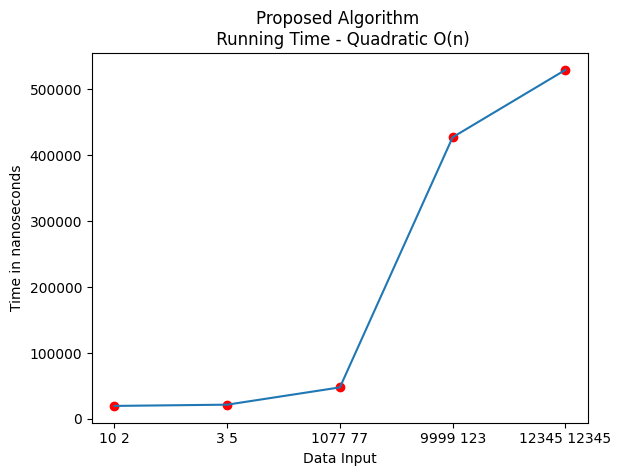

In [7]:
import matplotlib.pyplot as plt

x = ["10 2", "3 5", "1077 77", "9999 123", "12345 12345"]
y = [19800, 21700,  47900, 427200, 529300]

plt.scatter(x, y, color='red')
plt.plot(x, y)
plt.ylabel("Time in nanoseconds")
plt.xlabel("Data Input")
plt.title("Proposed Algorithm \n Running Time - Quadratic O(n)")
plt.show()

## Visualization 2.0

In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

In [44]:
# Create a temp for-loop to generate a dict of size-time value pairs
temp_data = {}
for i in range(0, 101):
    if i % 2 == 0:
        temp_data[i] = {'Algorithm': 'Square', 'Size': i, 'Runtime': i**2}
    else:
        temp_data[i] = {'Algorithm': 'Triple', 'Size': i, 'Runtime': i/3}


In [45]:
# Make a dataframe
df = pd.DataFrame(temp_data.values())
print(df.head())

# Make it interactive
idf = df.interactive()

  Algorithm  Size    Runtime
0    Square     0   0.000000
1    Triple     1   0.333333
2    Square     2   4.000000
3    Triple     3   1.000000
4    Square     4  16.000000


In [46]:
# Define panel widgets
size_slider = pn.widgets.IntSlider(name='Size', start=1, end=100, step=1)

In [12]:
@pn.depends(size_slider.param.value)
def update_plot(size):
    filtered_df = df[df['Size'] <= size]
    return filtered_df.hvplot(x='Size', y='Runtime', line_width=2, title='Test Runtimes')

pn.Row(size_slider, update_plot)

Row
    [0] IntSlider(end=100, name='Size', start=1, value=1)
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [13]:
# Radio buttons for Runtimes
# IDK, one metric ra i-measure which is runtime

In [47]:
algos = ['Square', 'Triple']
runtime_pipeline = (
    idf[(idf['Size'] <= size_slider) & (idf['Algorithm'].isin(algos))]
    .reset_index()
    .sort_values(by='Runtime')
    .reset_index(drop=True)
)


In [48]:
runtime_plot = runtime_pipeline.hvplot(x = 'Size',by='Algorithm', y='Runtime', line_width=2, title='Test Runtimes')
runtime_plot